In [43]:
import pandas as pd

def get_weekly_deaths(country):
    df = pd.read_csv(f'../data/worldometers/{country}.csv')
    weekly_deaths = []
    for week_end in range(len(df)-1, 6, -7):
        weekly_deaths.append(df.at[week_end,'coronavirus-deaths-linear'] - df.at[week_end-7,'coronavirus-deaths-linear'])
    return list(reversed(weekly_deaths))

countries = ['france', 'italy', 'spain', 'germany', 'sk']

country_curves = []
for country in countries:
    country_curves.append(get_weekly_deaths(country))

country_curves

[[1, 5, 54, 311, 1324, 3691, 6823, 5710, 3936, 2520, 1611],
 [17, 131, 868, 2389, 4810, 5700, 4364, 3891, 3379, 2418, 1991],
 [0, 3, 83, 745, 3534, 5983, 5099, 3683, 3027, 2386, 1527],
 [0, 0, 6, 38, 223, 840, 1500, 1445, 1523, 1048, 769],
 [12, 29, 24, 25, 40, 38, 35, 25, 11, 7, 9]]

In [44]:
us_df = pd.read_csv(f'../data/covid_tracker/us.csv').fillna(0)
us_df.head()

,date,states,positive,negative,pending,hospitalizedCurrently,hospitalizedCumulative,inIcuCurrently,inIcuCumulative,onVentilatorCurrently,...,hospitalized,total,totalTestResults,posNeg,fips,deathIncrease,hospitalizedIncrease,negativeIncrease,positiveIncrease,totalTestResultsIncrease
0,20200511,56,1340412,8041823.0,1989.0,44191.0,145981.0,11147.0,6488.0,6350.0,...,145981.0,9384224,9382235,9382235,0.0,837.0,1201.0,377106.0,17605.0,394711.0
1,20200510,56,1322807,7664717.0,3095.0,44943.0,144780.0,11393.0,6445.0,6395.0,...,144780.0,8990619,8987524,8987524,0.0,979.0,-2432.0,256182.0,21712.0,277894.0
2,20200509,56,1301095,7408535.0,3054.0,46637.0,147212.0,11496.0,6367.0,6551.0,...,147212.0,8712684,8709630,8709630,0.0,1529.0,5175.0,275663.0,25179.0,300842.0
3,20200508,56,1275916,7132872.0,3307.0,47718.0,142037.0,11780.0,6294.0,6788.0,...,142037.0,8412095,8408788,8408788,0.0,1760.0,6861.0,275496.0,27779.0,303275.0
4,20200507,56,1248137,6857376.0,3171.0,49130.0,135176.0,12137.0,5174.0,7070.0,...,135176.0,8108684,8105513,8105513,0.0,2746.0,3699.0,291140.0,27580.0,318720.0


In [45]:
us_weekly_deaths = []

for week_end in range(0, len(us_df)-7, 7):
    us_weekly_deaths.append(us_df.at[week_end,'death'] - us_df.at[week_end+7,'death'])
us_weekly_deaths.reverse()

In [46]:
country_curves.append(list(us_weekly_deaths))

In [47]:
curve_len = min([len(c) for c in country_curves])
country_curves = [c[-curve_len:] for c in country_curves]
country_curves

[[1, 5, 54, 311, 1324, 3691, 6823, 5710, 3936, 2520, 1611],
 [17, 131, 868, 2389, 4810, 5700, 4364, 3891, 3379, 2418, 1991],
 [0, 3, 83, 745, 3534, 5983, 5099, 3683, 3027, 2386, 1527],
 [0, 0, 6, 38, 223, 840, 1500, 1445, 1523, 1048, 769],
 [12, 29, 24, 25, 40, 38, 35, 25, 11, 7, 9],
 [11.0,
  24.0,
  63.0,
  423.0,
  2539.0,
  7877.0,
  12817.0,
  14245.0,
  12355.0,
  12426.0,
  12327.0]]

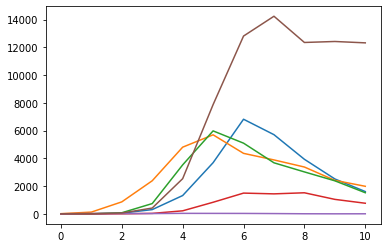

In [48]:
import matplotlib.pyplot as plt
for c in country_curves:
    plt.plot(c)
plt.show()

In [49]:
def get_weekly_cases(country):
    df = pd.read_csv(f'../data/worldometers/{country}.csv')
    weekly_deaths = []
    for week_end in range(len(df)-1, 6, -7):
        weekly_deaths.append(df.at[week_end,'coronavirus-cases-linear'] - df.at[week_end-7,'coronavirus-cases-linear'])
    return list(reversed(weekly_deaths))

case_curves = []
for country in countries:
    case_curves.append(get_weekly_cases(country))

case_curves

[[26, 385, 2453, 8119, 18160, 29950, 48591, 33076, 17411, 8995, 7613],
 [651, 3203, 11255, 25922, 39554, 34653, 28384, 25315, 21032, 15490, 10395],
 [23, 257, 2864, 14931, 39709, 54279, 41157, 31726, 28076, 26316, 17515],
 [32, 497, 2200, 12575, 28618, 40856, 33441, 19463, 15431, 9880, 6421],
 [1655, 4518, 1585, 696, 676, 735, 447, 190, 89, 63, 45]]

In [50]:
us_weekly_cases = []

for week_end in range(1, len(us_df)-7, 7):
    us_weekly_cases.append(us_df.at[week_end,'positive'] - us_df.at[week_end+7,'positive'])
us_weekly_cases.reverse()

In [51]:
us_weekly_cases

[0,
 1,
 0,
 0,
 38,
 681,
 4121,
 31492,
 107963,
 190421,
 217188,
 199740,
 208697,
 191663,
 170801]

In [52]:
states_df = pd.read_csv(f'../data/covid_tracker/states.csv').fillna(0)
states_df.head()

,date,state,positive,negative,pending,hospitalizedCurrently,hospitalizedCumulative,inIcuCurrently,inIcuCumulative,onVentilatorCurrently,...,hospitalized,total,totalTestResults,posNeg,fips,deathIncrease,hospitalizedIncrease,negativeIncrease,positiveIncrease,totalTestResultsIncrease
0,20200511,AK,381.0,28299.0,0.0,7.0,0.0,0.0,0.0,0.0,...,0.0,28680,28680,28680,2,0.0,0.0,1314.0,2.0,1316.0
1,20200511,AL,10009.0,119435.0,0.0,0.0,1256.0,0.0,463.0,0.0,...,1256.0,129444,129444,129444,1,8.0,16.0,1791.0,232.0,2023.0
2,20200511,AR,4034.0,64996.0,0.0,61.0,480.0,0.0,0.0,11.0,...,480.0,69030,69030,69030,5,6.0,9.0,3215.0,287.0,3502.0
3,20200511,AS,0.0,105.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,105,105,105,60,0.0,0.0,22.0,0.0,22.0
4,20200511,AZ,11380.0,138861.0,0.0,717.0,1537.0,297.0,0.0,201.0,...,1537.0,150241,150241,150241,4,6.0,9.0,12241.0,261.0,12502.0


In [53]:
georgia_df = states_df[states_df['state'] == 'WA']
georgia_df.head()

,date,state,positive,negative,pending,hospitalizedCurrently,hospitalizedCumulative,inIcuCurrently,inIcuCumulative,onVentilatorCurrently,...,hospitalized,total,totalTestResults,posNeg,fips,deathIncrease,hospitalizedIncrease,negativeIncrease,positiveIncrease,totalTestResultsIncrease
52,20200511,WA,16891.0,231984.0,0.0,350.0,0.0,110.0,0.0,0.0,...,0.0,248875,248875,248875,53,10.0,0.0,5669.0,217.0,5886.0
108,20200510,WA,16674.0,226315.0,0.0,335.0,0.0,101.0,0.0,0.0,...,0.0,242989,242989,242989,53,16.0,0.0,6868.0,286.0,7154.0
164,20200509,WA,16388.0,219447.0,0.0,393.0,3450.0,128.0,0.0,0.0,...,3450.0,235835,235835,235835,53,14.0,3450.0,4998.0,157.0,5155.0
220,20200508,WA,16231.0,214449.0,0.0,393.0,0.0,122.0,0.0,0.0,...,0.0,230680,230680,230680,53,21.0,0.0,5541.0,326.0,5867.0
276,20200507,WA,15905.0,208908.0,0.0,358.0,0.0,144.0,0.0,0.0,...,0.0,224813,224813,224813,53,8.0,0.0,5049.0,311.0,5360.0


In [54]:
import numpy as np

georgia_df.index = range(len(georgia_df))
ga_weekly_cases = []

for week_end in range(0, len(georgia_df)-7, 7):
    ga_weekly_cases.append(georgia_df.at[week_end,'positive'] - georgia_df.at[week_end+7,'positive'])
ga_weekly_cases.reverse()

np.array(ga_weekly_cases) / 7.0

array([0.00000000e+00, 1.42857143e-01, 0.00000000e+00, 0.00000000e+00,
       4.57142857e+00, 4.50000000e+01, 1.02571429e+02, 2.04142857e+02,
       4.41857143e+02, 4.19142857e+02, 2.94857143e+02, 2.51285714e+02,
       1.67857143e+02, 2.37714286e+02, 2.43714286e+02])

In [55]:
pa_df = states_df[states_df['state'] == 'PA']

pa_df.index = range(len(pa_df))
pa_weekly_cases = []
pa_weekly_deaths = []

for week_end in range(0, len(pa_df)-7, 7):
    pa_weekly_cases.append(pa_df.at[week_end,'positive'] - pa_df.at[week_end+7,'positive'])
    pa_weekly_deaths.append(pa_df.at[week_end,'death'] - pa_df.at[week_end+7,'death'])
    
pa_weekly_cases.reverse()
pa_weekly_deaths.reverse()

print(np.array(pa_weekly_deaths))
print(np.array(pa_weekly_cases))

[   0.    6.   43.  113.  362.  680.  393.  861. 1273.]
[   66.   568.  3443.  8893. 11219.  9033.  8818.  8042.  7062.]
